# Swap-Test

#### Import modules and packages

In [ ]:
%matplotlib inline

from Utils import *
from modeling import * 

#### Generate random data

In [2]:
seed = 543
np.random.seed(seed)

a = uniform(-10,10,2)
b = uniform(-10,10,2)

print('a =', np.round(a,2))
print('b =', np.round(b,2))

a = [ 9.95 -6.04]
b = [-6.   -6.49]


In [3]:
### Circuit for implementing the swap test

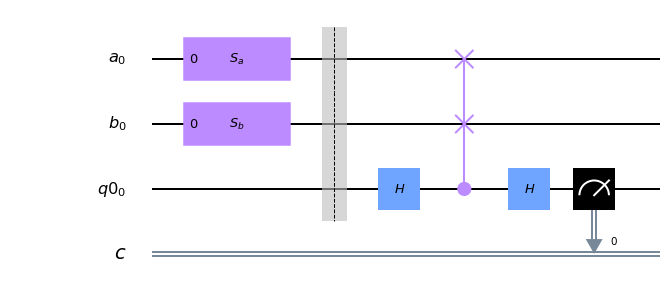

In [4]:
qc = quantum_swap_test(a, b)
qc.draw(output='mpl', scale=1)

## Quantum Algorithm for Swap-Test

The swap test is a procedure to measure how much two quantum states differ. If we encode in the amplitudes of two different qubits ( $\left|a\right\rangle$, $\left|b\right\rangle$ ), two 2-dimensional vectors ($a$, $b$), the output of the swap test will be function of the distance between the two vectors. The swap test is performed into two steps:

### Step 1: State Preparation

$a$ and $b$ are encoded into the amplitudes of two different qubits. The quantum system contains an additional qubit that will store the results:

$$\Big( \mathbb{1} \otimes S_{a} \otimes S_{b} \Big) \left|0\right\rangle \left|0\right\rangle \left|0\right\rangle = \left|0\right\rangle \left|a\right\rangle \left|b\right\rangle$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$.


### Step 2: Execution of the swap test

$$\big(H \otimes \mathbb{1} \otimes \mathbb{1}\big) \big(c-SWAP\big) \big(H \otimes \mathbb{1} \otimes \mathbb{1}\big) \left|0\right\rangle \left|a\right\rangle \left|b\right\rangle $$

where $H$ is the Hadamard gate, $c-SWAP$ is the controlled-swap operation which uses the third qubit as control qubit and swap $\left|a\right\rangle$ and $\left|b\right\rangle$ if the controlled qubits is equal to $\left|1\right\rangle$.

Measuring the first qubits produces the state $0$ with probability:
$$P\big(\left|0\right\rangle\big) = \frac{1+|\left\langle a|b \right\rangle|^2 }{2}$$

This probability is $1$ if $a=b$.

### Execute quantum swap-test

In [5]:
# Swap test using x1 as training on simulator
qc = quantum_swap_test(a,b)
measurement = exec_simulator(qc)
results = retrieve_proba(measurement)

print('The probability of state 0 is computed by quantum swap-test is:', results[0] )

The probability of state 0 is computed by quantum swap-test is: 0.521240234375


In [6]:
print('The same probability computed classically is:', classic_swap_test(a, b))

The same probability computed classically is: 0.5197854055003033
